In [2]:
import pandas as pd

wellness_df= pd.read_csv("./raw_data/wellness.csv")
rpe_df= pd.read_csv("./raw_data/rpe.csv")
games_df= pd.read_csv("./raw_data/games.csv")
gps_df= pd.read_csv("./raw_data/gps.csv")
wellness_df.dropna(inplace=True)
rpe_df.dropna(inplace=True)
games_df.dropna(inplace=True)
gps_df.dropna(inplace=True)
print(wellness_df.columns)
print(rpe_df.columns)
print(games_df.columns)
print(gps_df.columns)

Index(['Date', 'PlayerID', 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'BedTime', 'WakeTime', 'SleepHours', 'SleepQuality', 'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment',
       'USGMeasurement', 'USG', 'TrainingReadiness'],
      dtype='object')
Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'ObjectiveRating', 'FocusRating',
       'BestOutOfMyself'],
      dtype='object')
Index(['GameID', 'Date', 'Tournament', 'TournamentGame', 'Team', 'Opponent',
       'Outcome', 'TeamPoints', 'TeamPointsAllowed'],
      dtype='object')
Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude'],
      dtype='object')


In [3]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [5]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

print(gps_df.columns)
gps_df['Time'] = pd.to_datetime(gps_df.Time, format = '%H:%M:%S')
gps_df['TimeInSeconds'] = gps_df.Time.dt.hour * 3600 + gps_df.Time.dt.minute * 60 + gps_df.Time.dt.second
gps_df['GameClock'] = pd.to_datetime(gps_df.GameClock, format = '%H:%M:%S')
gps_df['GameClockInSeconds'] = gps_df.GameClock.dt.hour * 3600 + gps_df.GameClock.dt.minute * 60 + gps_df.GameClock.dt.second

new_data = gps_df.drop(['Time', 'GameClock','GameID','Half','PlayerID','FrameID'], axis=1)


Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude', 'TimeInSeconds', 'GameClockInSeconds'],
      dtype='object')


(3054917, 16) Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude', 'TimeInSeconds', 'GameClockInSeconds'],
      dtype='object')


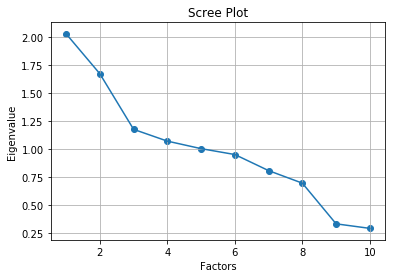

In [7]:
print(gps_df.shape,gps_df.columns)

# chi_square_value,p_value=calculate_bartlett_sphericity(gps_df)
# print(chi_square_value, p_value)
# kmo_all,kmo_model=calculate_kmo(gps_df)
# print(kmo_model)

fa = FactorAnalyzer(9, rotation="varimax")
#gps_df[gps_df.columns[~gps_df.columns.isin(['Time','GameClock'])]]
fa.fit(new_data)

ev, v = fa.get_eigenvalues()
plt.scatter(range(1,new_data.shape[1]+1),ev)
plt.plot(range(1,new_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [8]:
import numpy as np
fa = FactorAnalyzer(4, rotation="varimax")
fa.fit(new_data)
print(new_data.columns)
print(fa.loadings_)
print(np.where(fa.loadings_>0.5))

Index(['Speed', 'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ',
       'Longitude', 'Latitude', 'TimeInSeconds', 'GameClockInSeconds'],
      dtype='object')
[[ 0.98641     0.03730682 -0.0058534  -0.00306855]
 [ 0.46120334 -0.00757886 -0.00780098 -0.0076047 ]
 [ 0.68617794  0.01662529  0.25052741 -0.05060626]
 [ 0.01511239  0.04678894 -0.00354168  0.0262285 ]
 [ 0.10090064  0.01014174  0.32320013  0.147146  ]
 [-0.00475634  0.00702177  0.60230966 -0.14472972]
 [-0.05592137  0.85729564  0.01028613 -0.15689111]
 [ 0.04385505 -0.79097414 -0.05300322 -0.16258738]
 [ 0.00798207  0.05142143  0.08737383  0.36653163]
 [-0.01763361  0.00918898 -0.02540672  0.11907311]]
(array([0, 2, 5, 6], dtype=int64), array([0, 0, 2, 1], dtype=int64))


In [38]:
print(wellness_df.head())
print(rpe_df.head())
print(games_df.head())

         Date  PlayerID  Fatigue  Soreness  Desire  Irritability   BedTime  \
3  2018-07-21         4        2         3       5             4  00:30:00   
4  2018-07-21         5        5         3       4             4  23:45:00   
5  2018-07-21         7        2         2       5             4  22:00:00   
6  2018-07-21        10        2         2       4             4  22:30:00   
7  2018-07-21        11        4         3       6             4  23:00:00   

   WakeTime  SleepHours  SleepQuality  MonitoringScore Pain       Illness  \
3  07:00:00        6.50             1               15   No            No   
4  07:00:00        7.25             4               20   No            No   
5  07:00:00        9.00             3               16   No            No   
6  05:45:00        7.25             3               15   No  Slightly Off   
7  07:00:00        8.00             3               20   No  Slightly Off   

  Menstruation  Nutrition NutritionAdjustment USGMeasurement    USG 